### Title

### Introduction

A group of UBC students have created their own special minecraft server. The purpose of the server is to gather data about the players, and how they play the game to gain possible insights on machine learning and AI. The students have provided us with data about the individual players and logged sessions on the server. This data is in the form of two .csv (comma separated values) files - players.csv and sessions.csv. In this project we will highlight a specific question we have formulated about relationships, patterns or correlations between the data to find out specific information on the players and/or sessions. The conclusions of our projects will be provided to the owners of the server and used to assist in their study about AI and machine learning. Our topic of interest within the data sets is about predicting which “kinds” of players are most likely to contribute a large amount of data. What this topic really means is which types of players had the most total played hours on the minecraft server. Based on this topic, we have formulated a specific question to determine if there is any sort of correlation between the observations of variables within the dataset and the observations of the total played hours variable. We proposed, "Can gender, experience level, and age predict played_hours in the players.csv dataset?", as our predictive question. Throughout the report, we will use a series of data analysis, including visualization and modeling, to help answer the predictive question.


The players.csv dataset contains seven total variables, four of them being “played_hours”, “Age”, “gender” and “experience”. The following table has been created to summarize the 7 variables in the players.csv dataset. We must check if there are any N/A values in the observations of the players.csv dataset. This is necessary because when performing models and data visualizations in R, if there are any N/A values within the variables of interest it could possibly results in an error in the code. The following code reveals that within the "Age" column there are 2 N/A's. Therefore in future code we must make sure to remove these N/A's so we don't receive an error. 


In [1]:
# loads data 
# wrangles and cleans the data to the format necessary for the planned analysis
# performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
# creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
# performs the data analysis
# creates a visualization of the analysis 
# note: all figures should have a figure number and a legend




In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
# Load and Wrangle
data <- read_csv("data/players.csv") |> 
    clean_names() |>
    mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"), ordered = TRUE)) |>
    mutate(gender = fct_collapse(gender, Other = c("Agender", "Two-Spirited", "Other", "Prefer not to say", "Non-binary")))|>
    mutate(gender = factor(gender, levels = c("Male", "Female", "Other"))) # lump two_spirit and agenedr with other due to limited occurnaces

# Summary
sum_data <- data |>
summarize(n = n(), 
          mean_played = mean(played_hours), 
          sd_played = sd(played_hours), 
          min_age = min(age, na.rm = TRUE), 
          max_age = max(age, na.rm = TRUE))

sum_data_by_exp <- data |>
    group_by(experience) |>
    summarize(n = n(), 
              mean_played = mean(played_hours), 
              mean_age = mean(age, na.rm = TRUE))

sum_data_by_gender <- data |>
    group_by(gender) |>
    summarize(n = n(), 
              mean_played = mean(played_hours), 
              mean_age = mean(age, na.rm = TRUE))

head(data)
sum_data
sum_data_by_exp
sum_data_by_gender

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashed_email,played_hours,name,gender,age
<ord>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


n,mean_played,sd_played,min_age,max_age
<int>,<dbl>,<dbl>,<dbl>,<dbl>
196,5.845918,28.35734,9,58


experience,n,mean_played,mean_age
<ord>,<int>,<dbl>,<dbl>
Beginner,35,1.2485714,21.65714
Amateur,63,6.0174603,21.36508
Regular,36,18.2083333,22.02857
Veteran,48,0.6479167,20.95833
Pro,14,2.6000000,16.92308


gender,n,mean_played,mean_age
<fct>,<int>,<dbl>,<dbl>
Male,124,4.127419,20.85484
Female,37,10.635135,21.81081
Other,35,6.871429,21.45455


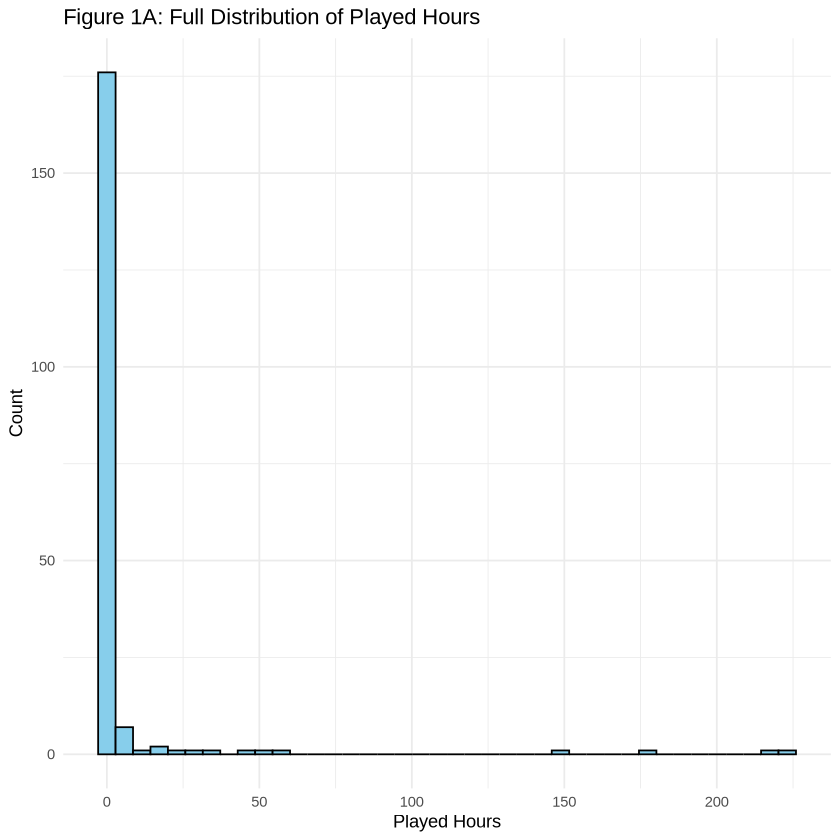

In [6]:
p1_full <- ggplot(data, aes(x=played_hours)) +
    geom_histogram(bins = 40, color = "black", fill = "skyblue") +
    labs(title = "Figure 1A: Full Distribution of Played Hours",
        x = "Played Hours",
        y = "Count") +
    theme_minimal()

p1_full

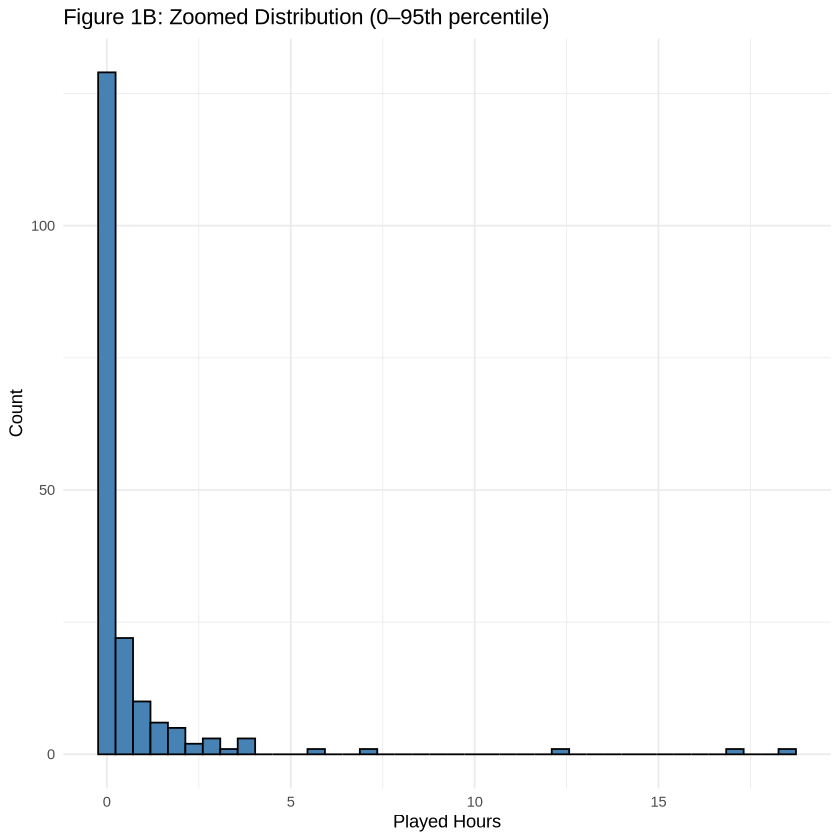

In [7]:
p95 <- quantile(data$played_hours, 0.95, na.rm = TRUE)

p1_zoom <- ggplot(data |> filter(played_hours <= p95), aes(x=played_hours)) +
    geom_histogram(bins = 40, color = "black", fill = "steelblue") +
    labs(title = "Figure 1B: Zoomed Distribution (0–95th percentile)",
        x = "Played Hours",
        y = "Count") +
    theme_minimal()

p1_zoom

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


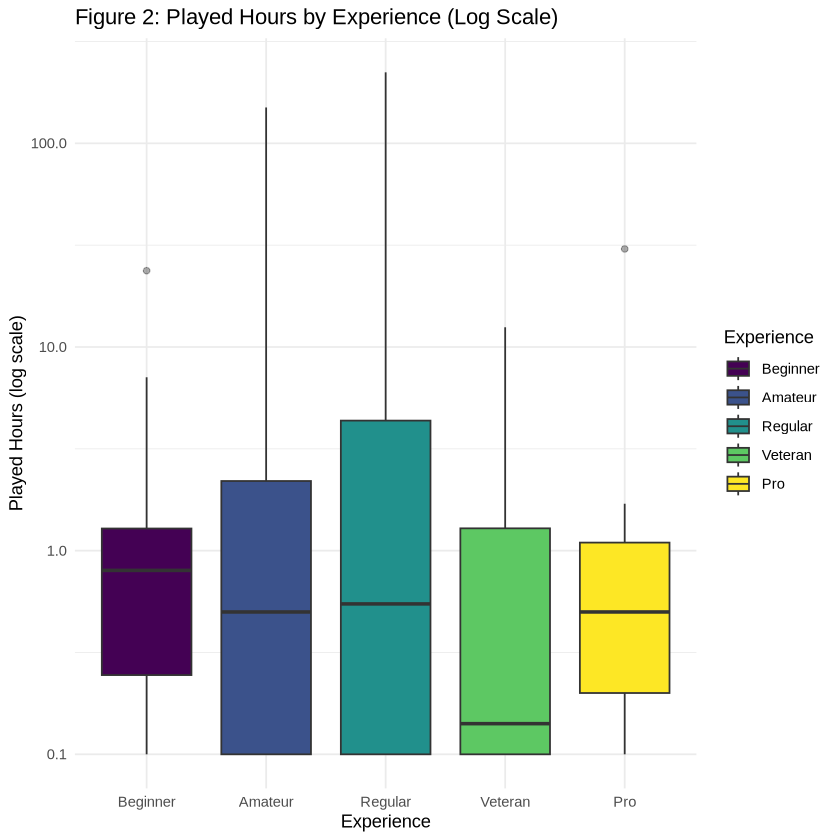

In [8]:
# Used a log scale for large discrepancies within y values so that we can actually see the boxplots
p2 <- ggplot(data, aes(experience, played_hours, fill = experience)) +
geom_boxplot(outlier.alpha = 0.4) +
scale_y_log10() +
labs(
    title = "Figure 2: Played Hours by Experience (Log Scale)",
    x = "Experience",
    y = "Played Hours (log scale)",
    fill = "Experience"
) +
theme_minimal()

p2

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


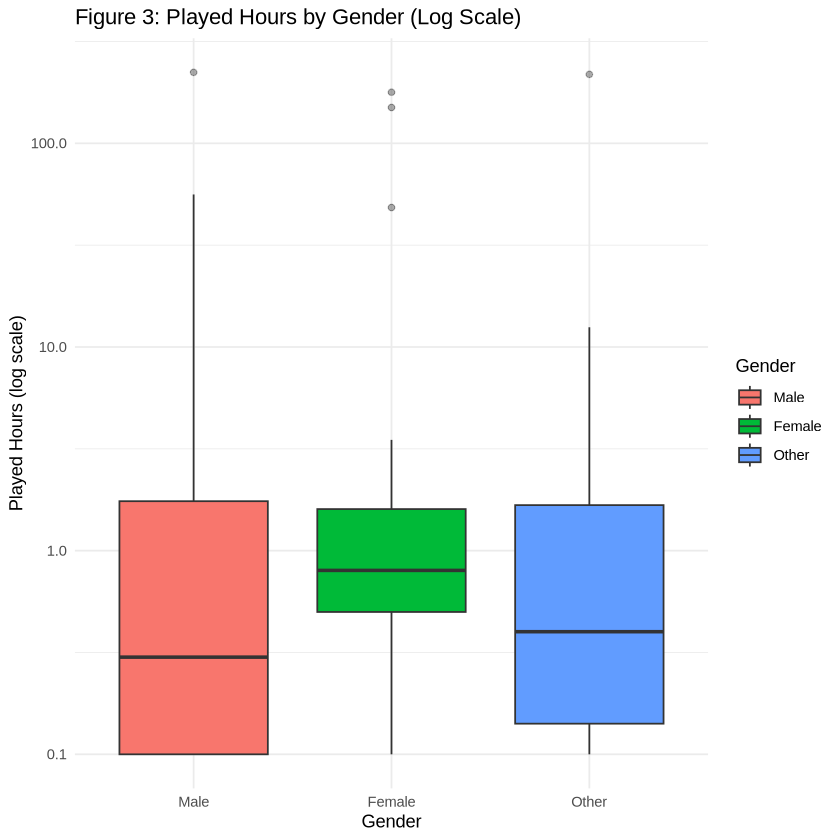

In [9]:
p3 <- ggplot(data, aes(gender, played_hours, fill = gender)) +
geom_boxplot(outlier.alpha = 0.4) +
scale_y_log10() +
labs(
    title = "Figure 3: Played Hours by Gender (Log Scale)",
    x = "Gender",
    y = "Played Hours (log scale)",
    fill = "Gender"
) +
theme_minimal()

p3

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


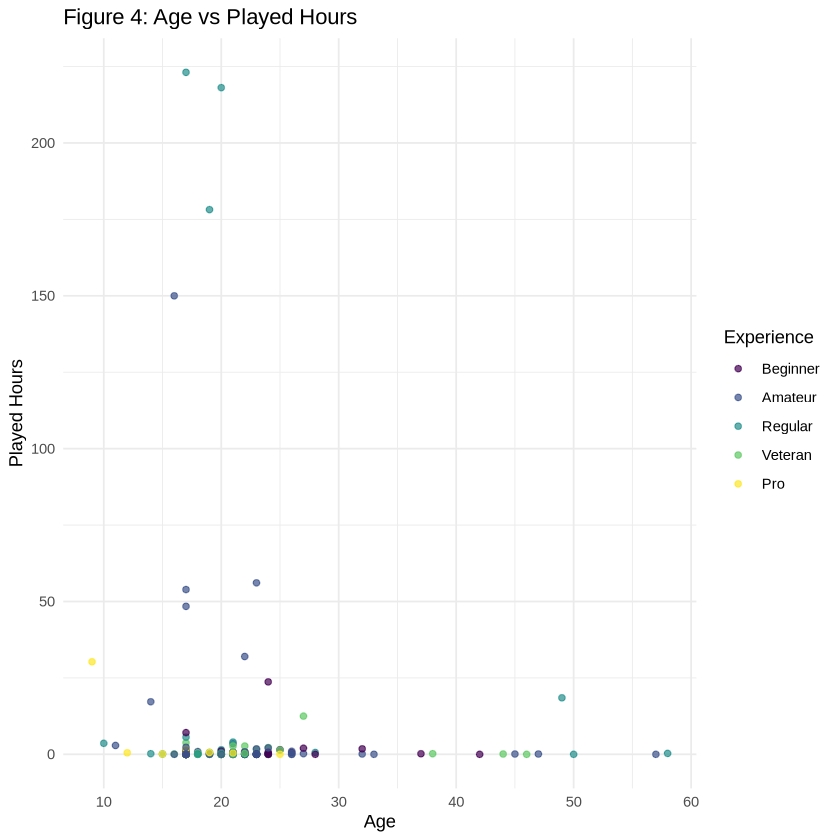

In [10]:
p4 <- ggplot(data, aes(x = age, y = played_hours, color = experience)) +
geom_point(alpha = 0.7) +
labs(
    title = "Figure 4: Age vs Played Hours",
    x = "Age",
    y = "Played Hours",
    color = "Experience"
) +
theme_minimal()
p4

In [ ]:
# Knn  !!! only age has NA values
model_data <- data |>
  select(played_hours, age, experience, gender)

split <- initial_split(model_data, prop = 0.8) # no strata since catagorial, used 0.8 split since it is standard for large datasets
training_data <- training(split)
testing_data  <- testing(split)


knn_recipe <- recipe(played_hours ~ ., data = training_data) |>
  step_impute_median(all_numeric_predictors()) |> # imputes/compensates for NA values in age
  step_novel(all_nominal_predictors()) |>   # this
  step_dummy(all_nominal_predictors(), one_hot = TRUE) |> # and this ensures the data always accounts for all gender/experience values
  step_zv(all_predictors()) |>
  step_normalize(all_predictors())

knn_model <- nearest_neighbor(mode = "regression", neighbors = tune(), weight_func = "rectangular") |>
  set_engine("kknn") |>
  set_mode("regression") 

data_vfold <- vfold_cv(training_data, v = 5)  # used 5 folds since we have small gorups of categorial predictors
k_grid <- tibble(neighbors = seq(3, 25, by = 2)) # 2 step to avoid excessive computation, range 3to 25 kinda arbitrary but is a good general rnage



knn_workflow <- workflow() |>
  add_model(knn_model) |>
  add_recipe(knn_recipe)

tune_results <- tune_grid(knn_workflow, resamples = data_vfold, grid = k_grid, metrics = metric_set(rmse, rsq, mae))

best_k <- select_best(tune_results, "rmse")
best_k

final_knn <- finalize_workflow(knn_workflow, best_k)

final_knn_fit <- fit(final_knn, data = training_data)

preds <- predict(final_knn_fit, testing_data) |>
  bind_cols(testing_data)

metrics(preds, truth = played_hours, estimate = .pred)

In [ ]:
pred_plot <- ggplot(preds, aes(x = played_hours, y = .pred)) +
  geom_point(alpha = 0.6, color = "blue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  labs(
    title = "Figure 5: KNN Predicted vs Actual Played Hours",
    x = "Actual Played Hours",
    y = "Predicted Played Hours"
  ) +
  theme_minimal()

preds_clean <- preds |>
  filter(played_hours < 100)



pred_plot_clean <- ggplot(preds_clean, aes(x = played_hours, y = .pred)) +
  geom_point(alpha = 0.6, color = "blue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  labs(
    title = "Figure 5: KNN Predicted vs Actual Played Hours",
    x = "Actual Played Hours",
    y = "Predicted Played Hours"
  ) +
  theme_minimal()
pred_plot_clean
pred_plot

In [ ]:
linreg_model <- linear_reg() |>
  set_engine("lm") |>
  set_mode("regression")

linreg_workflow <- workflow() |>
  add_model(linreg_model) |>
  add_recipe(
    recipe(played_hours ~ ., data = training_data) |>
      step_novel(all_nominal_predictors()) |>
      step_dummy(all_nominal_predictors(), one_hot = TRUE) |>
      step_zv(all_predictors()) |>
      step_normalize(all_predictors()) |>
      step_impute_median(all_numeric_predictors())  # handle age NAs
  )

linreg_fit <- fit(linreg_workflow, data = training_data)

preds_linreg <- predict(linreg_fit, testing_data) |>
  bind_cols(testing_data)

metrics(preds_linreg, truth = played_hours, estimate = .pred)


In [ ]:
preds_clean_lin <- preds_linreg |>
  filter(played_hours < 100)

pred_plot_lin <- ggplot(preds_clean_lin, aes(x = played_hours, y = .pred)) +
  geom_point(alpha = 0.6, color = "blue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  labs(
    title = "Figure 5: Linear Reg Predicted vs Actual Played Hours",
    x = "Actual Played Hours",
    y = "Predicted Played Hours"
  ) +
  theme_minimal()

pred_plot_lin